In [18]:
import pandas as pd
import pandas_datareader.data as pdr
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
!pip install --quiet yfinance 
import yfinance as yf


# Punto 1

In [19]:
activos = ["EA", "DIS"]
yf.pdr_override()
precios = pdr.get_data_yahoo(activos,start="2021-01-01",end="2022-12-31")["Adj Close"]
preciosm = pdr.get_data_yahoo(activos,start="2021-01-01",end="2022-12-31", interval= "1Mo")["Adj Close"]

[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed


In [20]:
retornos_d = np.log(precios).diff().dropna()
retornos_m = np.log(preciosm).diff().dropna()
retornos_y = (retornos_d.mean())*np.sqrt(252)
(retornos_d,retornos_m, retornos_y)

(                 DIS        EA
 Date                          
 2021-01-05  0.004268  0.012891
 2021-01-06  0.003804 -0.032507
 2021-01-07 -0.003019  0.028394
 2021-01-08  0.000616  0.007926
 2021-01-11  0.002236 -0.004522
 ...              ...       ...
 2022-12-23  0.015343  0.000741
 2022-12-27 -0.018810 -0.005695
 2022-12-28 -0.025802 -0.010651
 2022-12-29  0.035136  0.021926
 2022-12-30 -0.003447 -0.000082
 
 [502 rows x 2 columns],                  DIS        EA
 Date                          
 2021-02-01  0.116983 -0.066626
 2021-03-01 -0.024201  0.010396
 2021-04-01  0.008096  0.049618
 2021-05-01 -0.040426  0.005965
 2021-06-01 -0.016252  0.006277
 2021-07-01  0.001421  0.002093
 2021-08-01  0.029555  0.008646
 2021-09-01 -0.069249 -0.019408
 2021-10-01 -0.000591 -0.014160
 2021-11-01 -0.154269 -0.121372
 2021-12-01  0.066671  0.059990
 2022-01-01 -0.080080  0.007092
 2022-02-01  0.037681 -0.019563
 2022-03-01 -0.079167 -0.027905
 2022-04-01 -0.205958 -0.067866
 2022-05-01 -0

In [21]:
sigmad = retornos_d.std()
sigmam = retornos_m.std()
sigmay = sigmad*np.sqrt(252)
sigmad,sigmam,sigmay

(DIS    0.019992
 EA     0.016116
 dtype: float64, DIS    0.094156
 EA     0.068178
 dtype: float64, DIS    0.317359
 EA     0.255832
 dtype: float64)

In [22]:
precios.describe()

,DIS,EA
count,503.000000,503.000000
mean,145.214851,132.344439
std,34.962709,7.745425
min,84.169998,111.120789
25%,107.975002,126.106525
50%,151.339996,131.753418
75%,176.879997,139.611191
max,201.910004,147.397232


In [23]:
retornos_m['EA'].corr(retornos_m['DIS'],method="pearson")

0.5921896856544769

In [24]:
retornos_m['EA'].corr(retornos_m['DIS'], method='kendall')

0.391304347826087

In [25]:
retornos_m['EA'].corr(retornos_m['DIS'], method='spearman')

0.5454545454545454

Text(0, 0.5, 'Probabilidad')

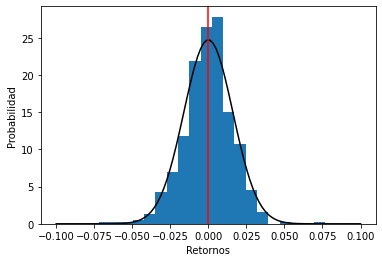

In [27]:
from scipy.stats import norm
x = np.linspace(-0.1,0.1,num=100)
plt.hist(retornos_d['EA'],bins = 20,density=True,histtype="bar")
plt.plot(x,norm.pdf(x,scale = retornos_d ['EA'].std()),'K')
plt.axvline(retornos_d['EA'].mean(),color="Red")
plt.xlabel("Retornos")
plt.ylabel("Probabilidad")

Text(0, 0.5, 'Probabilidad')

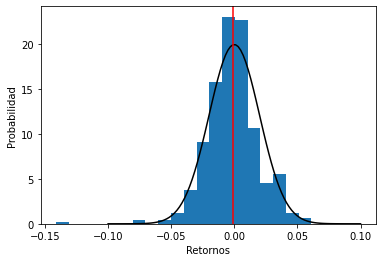

In [28]:
x = np.linspace(-0.1,0.1,num=100)
plt.hist(retornos_d['DIS'],bins = 20,density=True,histtype="bar")
plt.plot(x,norm.pdf(x,scale = retornos_d ['DIS'].std()),'K')
plt.axvline(retornos_d['DIS'].mean(),color="Red")
plt.xlabel("Retornos")
plt.ylabel("Probabilidad")

# Punto 2

In [30]:
Activos = ["AAPL", "AMZN","EA","DIS","ATVI","ROL","WBD","KO","TSLA","AAL"]
Precios = yf.download(Activos,start="2017-12-01",end="2022-12-31",interval= "1Mo")["Adj Close"]
retornos = np.log(Precios/Precios.shift(1)).dropna()

[*********************100%***********************]  10 of 10 completed


In [31]:
sigmav = retornos.std()
sigmav

AAL     0.136396
AAPL    0.092114
AMZN    0.097632
ATVI    0.092077
DIS     0.092705
EA      0.082204
KO      0.057042
ROL     0.074922
TSLA    0.196036
WBD     0.140951
dtype: float64

In [32]:
retornos.mean()

AAL    -0.023050
AAPL    0.019540
AMZN    0.006037
ATVI    0.003670
DIS    -0.002953
EA      0.002715
KO      0.008096
ROL     0.010445
TSLA    0.029680
WBD    -0.014316
dtype: float64

# Punto 3

In [34]:
activos = ["^RUT"]
yf.pdr_override()
precios = pdr.get_data_yahoo(activos,start="2011-12-01",end="2022-12-31",interval= "1Mo")["Adj Close"]

[*********************100%***********************]  1 of 1 completed


In [35]:
retornos = np.log(precios/precios.shift(1)).dropna()
sigmam = retornos.std()
sigmay = sigmam*np.sqrt(12)
sigmam, sigmay

(0.05474479591479422, 0.18964153594882538)

In [36]:
precios = pdr.get_data_yahoo(activos,start="2011-12-01",end="2022-12-31",interval= "1Mo")
lnHL = np.log(precios["High"]/precios["Low"]).dropna()
sigmaPark_m = ((1/(4*np.log(2)))*lnHL**2)**0.5
sigmaPark_y = (sigmaPark_m.mean())*np.sqrt(12)
sigmaPark_m, sigmaPark_y

[*********************100%***********************]  1 of 1 completed


(Date
 2011-12-01    0.039045
 2012-01-01    0.049605
 2012-02-01    0.026554
 2012-03-01    0.045991
 2012-04-01    0.042529
                 ...   
 2022-08-01    0.058028
 2022-09-01    0.086390
 2022-10-01    0.073133
 2022-11-01    0.048681
 2022-12-01    0.058579
 Length: 133, dtype: float64, 0.1767113126308943)

In [37]:
lnHL = np.log(precios["High"]/precios["Low"]).dropna()
lnCO = np.log(precios["Close"]/precios["Open"]).dropna()
sigmaGK_m = (0.5*lnHL**2-(2*np.log(2)-1)*lnCO**2)**0.5
sigmaGK_y = (sigmaGK_m.mean())*np.sqrt(252)
sigmaGK_m,sigmaGK_y

(Date
 2011-12-01    0.045653
 2012-01-01    0.047539
 2012-02-01    0.029346
 2012-03-01    0.052724
 2012-04-01    0.049245
                 ...   
 2022-08-01    0.067750
 2022-09-01    0.083748
 2022-10-01    0.065267
 2022-11-01    0.056867
 2022-12-01    0.052694
 Length: 133, dtype: float64, 0.8318012040755021)

In [38]:
def vol_ewma(retornos,Lambda):
  Lambda = 0.94
  k = len(retornos)
  td = np.arange(k-1,-1,-1)
  alpha = Lambda**td
  var_s = (retornos**2*alpha).sum()*(1-Lambda)
  vol_m = np.sqrt(var_s)
  return(vol_m)

In [39]:
vol_m = vol_ewma(retornos,Lambda= 0.94)
vol_y = vol_m*np.sqrt(12) 
vol_m , vol_y

(0.06830769009655513, 0.23662477958980582)